## Import Section

In [146]:
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

## Data Analysis Section

In [147]:
filepath = 'btc-usd-max-30d.csv'
btc_df = pd.read_csv(filepath, parse_dates=['snapped_at'], index_col=['snapped_at'])
btc_df.head()

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


In [148]:
btc_df.index = btc_df.index.date
btc_df.index = pd.DatetimeIndex(btc_df.index).to_period('D')

In [149]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 3807 entries, 2013-04-28 to 2023-10-01
Freq: D
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3807 non-null   float64
 1   market_cap    3806 non-null   float64
 2   total_volume  3807 non-null   float64
dtypes: float64(3)
memory usage: 119.0 KB


In [150]:
btc_df_price = btc_df['price']
btc_df_price.head()

2013-04-28    135.30
2013-04-29    141.96
2013-04-30    135.30
2013-05-01    117.00
2013-05-02    103.43
Freq: D, Name: price, dtype: float64

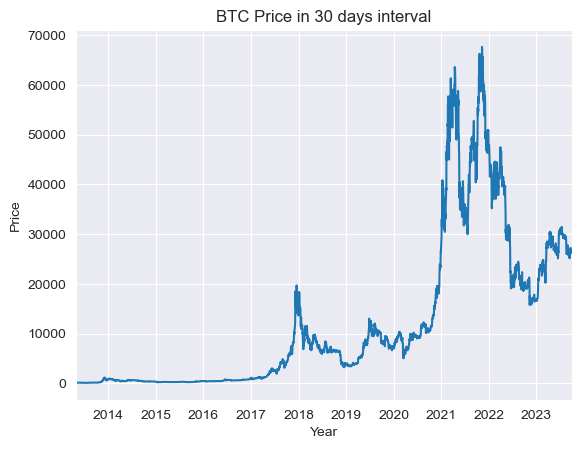

In [151]:
btc_df_price.plot()
plt.title('BTC Price in 30 days interval')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Modelling Section

In [152]:
X_values = btc_df_price.values

In [153]:
train_size = int(len(X_values) * 0.66)
train_data, test_data = X_values[0:train_size], X_values[train_size:len(X_values)]

In [154]:
history = [data for data in train_data]
predictions = list()

# walk-forward validation
for data in range(len(test_data)):
    arima_model = ARIMA(history, order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    predicted_value = output[0]
    predictions.append(predicted_value)
    actual_value = test_data[data]
    history.append(actual_value)
    print('Predicted = %f, Expected = %f' % (predicted_value, actual_value))

Predicted = 5094.678534, Expected = 5397.933357
Predicted = 5543.431242, Expected = 5032.501351
Predicted = 4781.521478, Expected = 5389.415775
Predicted = 5446.001533, Expected = 5376.280748
Predicted = 5326.215992, Expected = 6170.200600
Predicted = 6207.422841, Expected = 6195.603505
Predicted = 6136.359850, Expected = 6145.770891
Predicted = 6190.160785, Expected = 5859.647430
Predicted = 5834.583429, Expected = 6456.347486
Predicted = 6517.162272, Expected = 6730.173782
Predicted = 6709.430915, Expected = 6695.900618
Predicted = 6707.461609, Expected = 6765.562079
Predicted = 6737.460986, Expected = 6397.826328
Predicted = 6425.523420, Expected = 6255.000399
Predicted = 6286.450650, Expected = 5915.337155
Predicted = 5904.481019, Expected = 6403.141236
Predicted = 6427.117101, Expected = 6421.705414
Predicted = 6379.322487, Expected = 6640.797666
Predicted = 6653.172858, Expected = 6807.897018
Predicted = 6765.597342, Expected = 6732.852018
Predicted = 6764.349568, Expected = 6859

Test RMSE: 1204.834


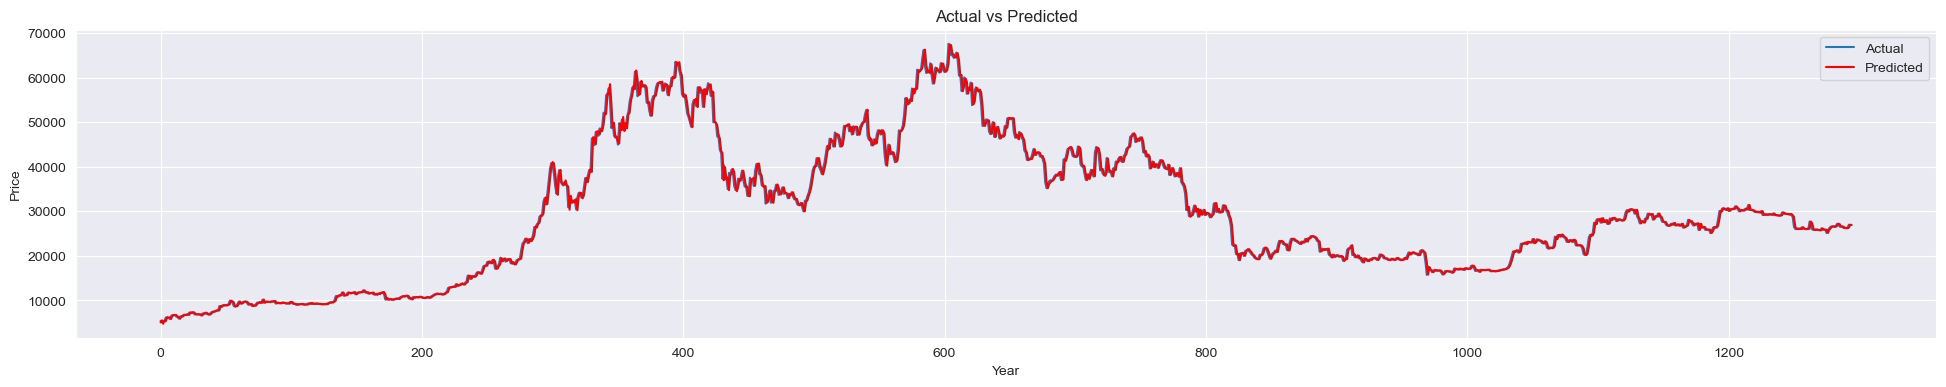

In [159]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.figure(figsize=(24,4))
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.title("Actual vs Predicted")
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'])
plt.show()